# CO2 Emissions Analysis Using Regression Models 

The goal of this project is to analyze and forecast a vehicle's CO2 emissions by taking into account a number of engine and vehicle attributes, such as test conditions, fuel type, and engine size.  The dataset is thoroughly preprocessed, with missing values being filled in, categorical variables being encoded, and numerical features being scaled for best results.  The fundamental modeling technique is linear regression, and metrics like RMSE, MAE, and R2 are used to assess how accurate it is.  To increase model reliability, hyperparameter adjustment is done with tools like GridSearchCV.  This initiative intends to promote improvements in sustainable vehicle technologies and assist environmental decision-making by providing actionable insights into CO2 emissions.

## **Step 1 : Import Libraries and Load Data**

* **pandas**: Used for data manipulation and analysis, offering powerful data structures like DataFrames to handle and process structured data efficiently.
* **numpy**: Provides support for numerical operations on large multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.
* **matplotlib.pyplot**: Used for creating static, interactive, and animated visualizations in Python, enabling plotting of various graphs such as line charts, scatter plots, and histograms.
* **seaborn**: A data visualization library built on matplotlib, providing a high-level interface to create statistical graphics such as heatmaps, pair plots, and box plots.
* **sklearn.model_selection**:
    * **train_test_split**: Splits the dataset into training and testing sets, ensuring an appropriate balance for model training and validation.
    * **GridSearchCV**: Performs an exhaustive search over specified hyperparameter values, identifying the best-performing model.
    * **cross_val_score**: Evaluates model performance through cross-validation by splitting the data into multiple folds and computing average accuracy.
* **sklearn.preprocessing**:
  * **StandardScaler**: Standardizes features by removing the mean and scaling to unit variance, ensuring all features contribute equally to the model.
  * **OneHotEncoder**: Converts categorical variables into a binary matrix (dummy variables), enabling models to interpret non-numerical features.
* **sklearn.compose**:
  * **ColumnTransformer**: Applies different transformations to specific columns in the dataset, allowing a combination of encoding and scaling steps in a single pipeline.
* **sklearn.linear_model**:
  * **LinearRegression**: Builds a linear model by fitting a straight line to the data, predicting the target variable based on input features.
  * **Ridge**: A variation of linear regression that introduces L2 regularization, which reduces model complexity by penalizing large coefficients.
  * **Lasso**: Applies L1 regularization to linear regression, effectively performing feature selection by shrinking less important feature coefficients to zero.
* **sklearn.metrics**:
  * **mean_squared_error (MSE)**: Measures the average squared difference between actual and predicted values, penalizing large errors.
  * **mean_absolute_error (MAE)**: Computes the average absolute difference between actual and predicted values, giving equal weight to all errors.
  * **r2_score (R²)**: Indicates how well the model fits the data, representing the proportion of variance explained by the model.
* **sklearn.pipeline**:
  * **Pipeline**: Automates a sequence of data processing and model training steps, ensuring a streamlined workflow without repeated manual operations.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv(r"C:\Users\Sarita Safare\Downloads\CO2 Emissions_Canada (1).csv")
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


## **Step 2 : Exploratory Data Analysis**

In [6]:
df.isnull()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,False,False,False,False,False,False,False,False,False,False,False,False
7381,False,False,False,False,False,False,False,False,False,False,False,False
7382,False,False,False,False,False,False,False,False,False,False,False,False
7383,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [8]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [9]:
df.tail()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS8,Z,12.2,8.7,10.7,26,248


In [10]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [11]:
df.isna().any()

Make                                False
Model                               False
Vehicle Class                       False
Engine Size(L)                      False
Cylinders                           False
Transmission                        False
Fuel Type                           False
Fuel Consumption City (L/100 km)    False
Fuel Consumption Hwy (L/100 km)     False
Fuel Consumption Comb (L/100 km)    False
Fuel Consumption Comb (mpg)         False
CO2 Emissions(g/km)                 False
dtype: bool

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [13]:
df.count()

Make                                7385
Model                               7385
Vehicle Class                       7385
Engine Size(L)                      7385
Cylinders                           7385
Transmission                        7385
Fuel Type                           7385
Fuel Consumption City (L/100 km)    7385
Fuel Consumption Hwy (L/100 km)     7385
Fuel Consumption Comb (L/100 km)    7385
Fuel Consumption Comb (mpg)         7385
CO2 Emissions(g/km)                 7385
dtype: int64

In [14]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [15]:
df.shape

(7385, 12)

In [16]:
df.Make.unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

In [17]:
df.Make.nunique()

42

In [18]:
df['Make'].value_counts()

Make
FORD             628
CHEVROLET        588
BMW              527
MERCEDES-BENZ    419
PORSCHE          376
TOYOTA           330
GMC              328
AUDI             286
NISSAN           259
JEEP             251
DODGE            246
KIA              231
HONDA            214
HYUNDAI          210
MINI             204
VOLKSWAGEN       197
MAZDA            180
LEXUS            178
JAGUAR           160
CADILLAC         158
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
RAM               97
LINCOLN           96
MITSUBISHI        95
CHRYSLER          88
LAND ROVER        85
FIAT              73
ACURA             72
MASERATI          61
ROLLS-ROYCE       50
ASTON MARTIN      47
BENTLEY           46
LAMBORGHINI       41
ALFA ROMEO        30
GENESIS           25
SCION             22
SMART              7
BUGATTI            3
SRT                2
Name: count, dtype: int64

<Axes: >

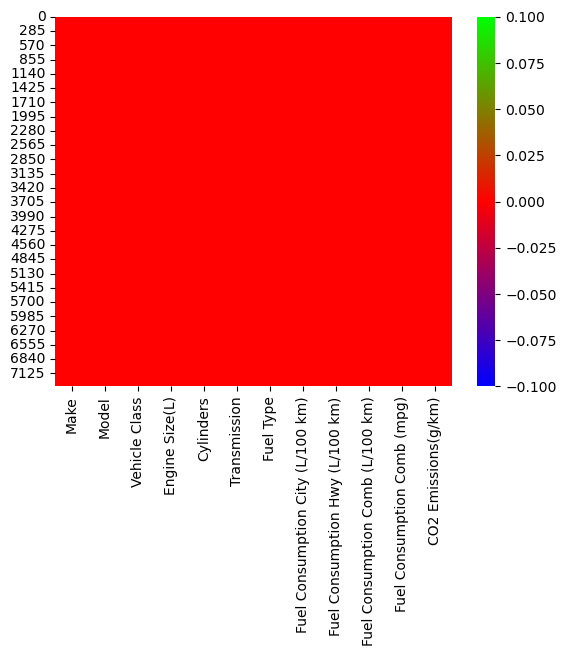

In [19]:
sns.heatmap(df.isnull() , cmap ="brg")

## **Step 3 : Data Preprocessing**

In [21]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_cols)

Categorical Columns: Index(['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type'], dtype='object')


In [22]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:", numerical_cols)

Numerical Columns: Index(['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')


In [23]:
numerical_cols= ['CO2 Emissions(g/km)','Fuel Consumption City (L/100 km)']
scaler = StandardScaler()
scaled_cols=pd.DataFrame(scaler.fit_transform(df[numerical_cols]),columns=numerical_cols)

In [24]:
df_encoded = pd.get_dummies(df)  

In [25]:
x = pd.concat ([df_encoded,scaled_cols] ,axis = 1)
y = df['CO2 Emissions(g/km)']

In [26]:
Q1 = df["CO2 Emissions(g/km)"].quantile(0.25)
Q3 = df["CO2 Emissions(g/km)"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["CO2 Emissions(g/km)"] < lower_bound) | (df["CO2 Emissions(g/km)"] > upper_bound)]
print(f"Total Outliers Detected: {len(outliers)}")

df_cleaned = df[(df["CO2 Emissions(g/km)"] >= lower_bound) & (df["CO2 Emissions(g/km)"] <= upper_bound)]

print(f"Dataset size before removing outliers: {df.shape[0]}")
print(f"Dataset size after removing outliers: {df_cleaned.shape[0]}")


Total Outliers Detected: 80
Dataset size before removing outliers: 7385
Dataset size after removing outliers: 7305


In [27]:
from scipy.stats import zscore
df["Z_Score"] = zscore(df["CO2 Emissions(g/km)"])
threshold = 3

df_no_outliers = df[abs(df["Z_Score"]) < threshold]
df_no_outliers = df_no_outliers.drop(columns=["Z_Score"])  # Drop Z-score column after removal

print(f"Dataset size before removing outliers: {df.shape[0]}")
print(f"Dataset size after removing outliers: {df_no_outliers.shape[0]}")


Dataset size before removing outliers: 7385
Dataset size after removing outliers: 7340


In [28]:
from scipy.stats.mstats import winsorize
df["CO2 Emissions(g/km)"] = winsorize(df["CO2 Emissions(g/km)"], limits=[0.05, 0.05])


## **Step 4: Model Building**
 To train and evaluate a Linear Regression model using different techniques.
  
Common Steps:

- **Model Training**:

Train a Linear Regression model on the scaled dataset (X_scaled) and target variable (y).

- **Prediction**:

Use the trained model to make predictions on test data (X_test).

- **Evaluation Metrics**:
Since Linear Regression is used for continuous predictions, we use different metrics than classification:

- **Mean Absolute Error (MAE)**: Measures the average magnitude of errors in predictions.

- **Mean Squared Error (MSE)**: Penalizes large errors more than MAE.

- **Root Mean Squared Error (RMSE)**: The square root of MSE, making it easier to interpret.

- **R² Score (Coefficient of Determination)**: Measures how well the model explains variance in the data.

**Split into training and testing sets**

* **train_test_split()** splits data into training (80%) and testing (20%) subsets.
* **random_state=42** ensures reproducibility by generating the same split each time.

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.75, random_state=42) # either train_size or test_test)

In [32]:
LR = LinearRegression()
LR

LinearRegression()

In [33]:
LR.fit(x_train,y_train)

LinearRegression()

In [34]:
y_pred= LR.predict(x_test)

In [35]:
r2score=(y_test,y_pred)

In [36]:
mse= mean_squared_error(y_test,y_pred)
mse

3.951953796626648e-09

In [37]:
mae = mean_absolute_error(y_test,y_pred)
mae

1.2303888950460144e-05

In [38]:
r2square = r2_score(y_test,y_pred)
r2square

0.9999999999988415

In [39]:
rsme = np.sqrt(mse)
rsme

6.2864567099652e-05

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge , Lasso

In [41]:
lr_model= LinearRegression()
lr_score = cross_val_score(lr_model,x_train,y_train,cv=5)

In [42]:
ridge_model= Ridge(alpha=1.0)
ridge_score = cross_val_score(ridge_model,x_train,y_train,cv=5)

In [43]:
lasso_model= Lasso(alpha=1.0)
lasso_score = cross_val_score(lr_model,x_train,y_train,cv=5)

In [44]:
lr_model.fit(x_train,y_train)
lr_predictions = lr_model.predict(x_test)
lr_mse = mean_squared_error(y_test,lr_predictions)
lr_mse
lr_r2 = r2_score(y_test,lr_predictions)
lr_r2

0.9999999999988415

In [45]:
ridge_model.fit(x_train,y_train)
ridge_predictions = ridge_model.predict(x_test)
ridge_r2 = r2_score(y_test,ridge_predictions)
ridge_r2

0.999999999999029

In [46]:
lasso_model.fit(x_train,y_train)
lasso_predictions = lasso_model.predict(x_test)
lasso_r2 = r2_score(y_test,ridge_predictions)
lasso_r2

0.999999999999029

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

LR = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

LR.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
LR.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         275,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 291,393 (1.11 MB)

 Trainable params: 291,009 (1.11 MB)

 Non-trainable params: 384 (1.50 KB)

- **EarlyStopping**

In [49]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

LR = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1, activation='linear')  # Output Layer
])

# Step 2: Compile the Model
LR.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Step 3: Define Early Stopping Callback
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

# Step 4: Train the Model
history = LR.fit(
    x_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 65049.1992 - val_loss: 50462.2148
Epoch 2/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 62092.0195 - val_loss: 46288.4648
Epoch 3/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 53970.0938 - val_loss: 41168.6406
Epoch 4/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 44892.5195 - val_loss: 38550.4219
Epoch 5/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 35002.8828 - val_loss: 28368.9961
Epoch 6/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 23891.1211 - val_loss: 20192.2852
Epoch 7/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 15407.1650 - val_loss: 11030.1592
Epoch 8/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 8310.6816 - val_loss: 5013.8340
Epoch 9/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 4139.3320 - val_loss: 2176.4517
Epoch 10/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 2037.8162 - val_loss: 776.9666
Epoch 11/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 1

In [50]:
test_loss = LR.evaluate(x_test, y_test)  # Returns only loss
print(f"Test MSE: {test_loss:.2f}")  # Since loss=MSE, we print it


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.9946
Test MSE: 3.18


In [51]:
y_pred = LR.predict(x_test)

r2 = r2_score(y_test, y_pred)
print(f"R² Skoru: {r2:.4f}")

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
R² Skoru: 0.9991


dict_keys(['loss', 'val_loss'])


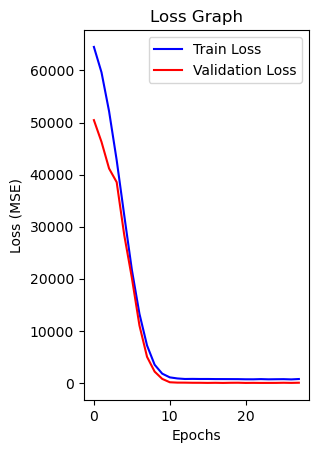

In [52]:
LR.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
print(history.history.keys())
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], color='b', label='Train Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Loss Graph')
plt.legend()


# **Step 5 : Model Evaluation**

- **Histograms with KDE (Kernel Density Estimate) curves** 

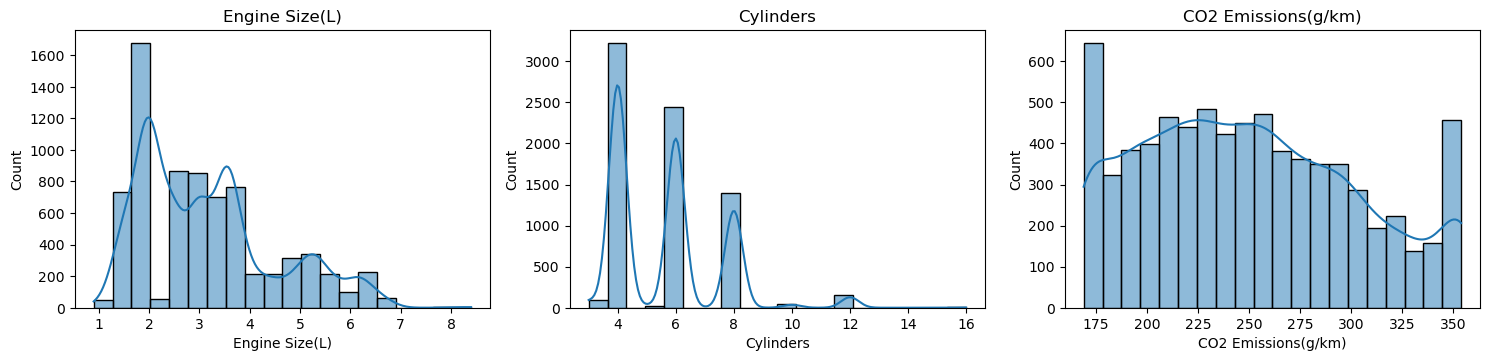

In [55]:
numerical_cols = ['Engine Size(L)','Cylinders','CO2 Emissions(g/km)']

plt.figure(figsize=(15, 10))
sns.set_palette("tab10")

for i, column in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=column,  bins=20,kde=True)  # Use sns.histplot for newer versions
    plt.title(column)

plt.tight_layout()
plt.show()

- **Coefficient A (Slope) → Shows the rate of change of log(CO2 Emissions(g/km)) per unit increase in Cylinders.**

- **Coefficient B (Intercept) → The baseline CO2 emissions when Cylinders = 0 (in log scale).**

In [57]:
fit = np.polyfit(df['Cylinders'], np.log(df['CO2 Emissions(g/km)']), 1)
print('Coefficient A (Slope)  = ', fit[0])  
print('Coefficient B (Intercept) = ', fit[1])  

Coefficient A (Slope)  =  0.09374398149703929
Coefficient B (Intercept) =  4.972829466509936


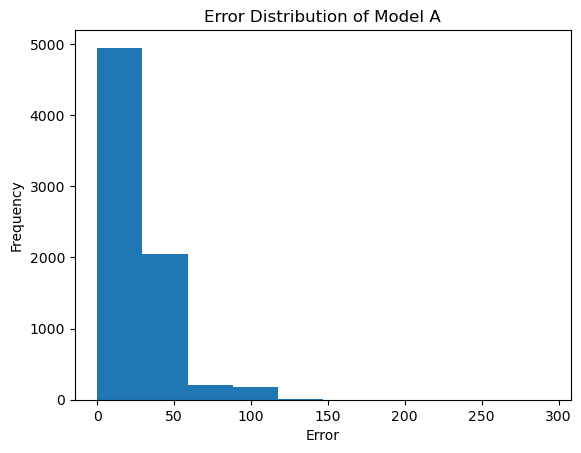

count    7385.000000
mean       24.290628
std        20.567648
min         0.146602
25%         9.245859
50%        19.853398
75%        35.146602
max       293.250349
Name: errors_model_A, dtype: float64


In [58]:
df['CO2 Emissions(g/km)'] = df['CO2 Emissions(g/km)'] + 1e-5  
fit = np.polyfit(df['Cylinders'], np.log(df['CO2 Emissions(g/km)']), 1)
df['model_A'] = np.exp(fit[1]) * np.exp(fit[0] * df['Cylinders'])
df['errors_model_A'] = np.abs(df['CO2 Emissions(g/km)'] - df['model_A'])
df['errors_model_A'].hist(grid=False)
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.title("Error Distribution of Model A")
plt.show()
print(df['errors_model_A'].describe())

In [59]:
np.sqrt(df['CO2 Emissions(g/km)']).describe()

count    7385.000000
mean       15.722972
std         1.651380
min        13.000000
25%        14.422205
50%        15.684387
75%        16.970563
max        18.814888
Name: CO2 Emissions(g/km), dtype: float64

- **A (Slope): Shows how Cylinders impact CO2 emissions.**

- **B (Intercept): Baseline CO2 emissions when Cylinders = 0 (hypothetical).**

In [61]:
fit = np.polyfit(df['Cylinders'], np.log(df['CO2 Emissions(g/km)']), 1, w = np.sqrt(df['CO2 Emissions(g/km)']))
print('Coefficient A  = ', fit[0])
print('Coefficient B = ', fit[1])

# Small offset to prevent log(0) issues
df['CO2 Emissions(g/km)'] += 1e-5  
fit = np.polyfit(df['Cylinders'], np.log(df['CO2 Emissions(g/km)']), 1, w=np.sqrt(df['CO2 Emissions(g/km)']))


Coefficient A  =  0.0876886443278236
Coefficient B =  5.022590231651575


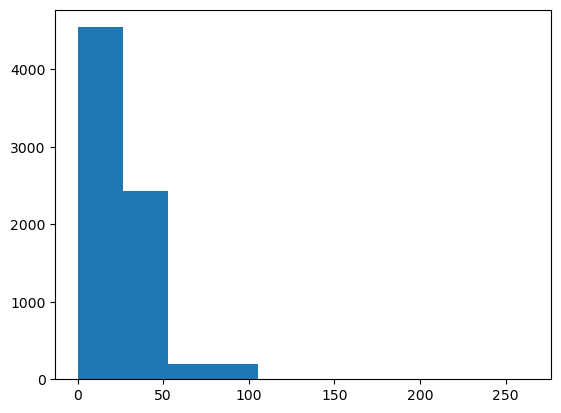

In [62]:
df['model_B'] = np.exp(fit[1]) * np.exp(fit[0] * df['Cylinders']) 
df['errors_model_B']  = np.abs(df['CO2 Emissions(g/km)'] - df['model_B'])
df.errors_model_B.hist(grid=False)
df.errors_model_B.describe()
plt.show()

In [63]:
r2 = r2_score(df['CO2 Emissions(g/km)'], df['model_B'])
print("R² Score:", r2)

R² Score: 0.6439480144171341


In [64]:
pop = pd.read_csv(r"C:\Users\Sarita Safare\Downloads\CO2 Emissions.csv")

In [65]:
pop.head()

,Make,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,2.0,4,9.9,6.7,8.5,33,196
1,ACURA,2.4,4,11.2,7.7,9.6,29,221
2,ACURA,1.5,4,6.0,5.8,5.9,48,136
3,ACURA,3.5,6,12.7,9.1,11.1,25,255
4,ACURA,3.5,6,12.1,8.7,10.6,27,244


In [66]:
pop.columns

Index(['Make', 'Engine Size(L)', 'Cylinders',
       'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)',
       'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)',
       'CO2 Emissions(g/km)'],
      dtype='object')

- **This code correctly applies a log transformation to fuel consumption data and plots a clean boxplot. It ensures no missing or incorrect values are used, making an analysis more robust.**

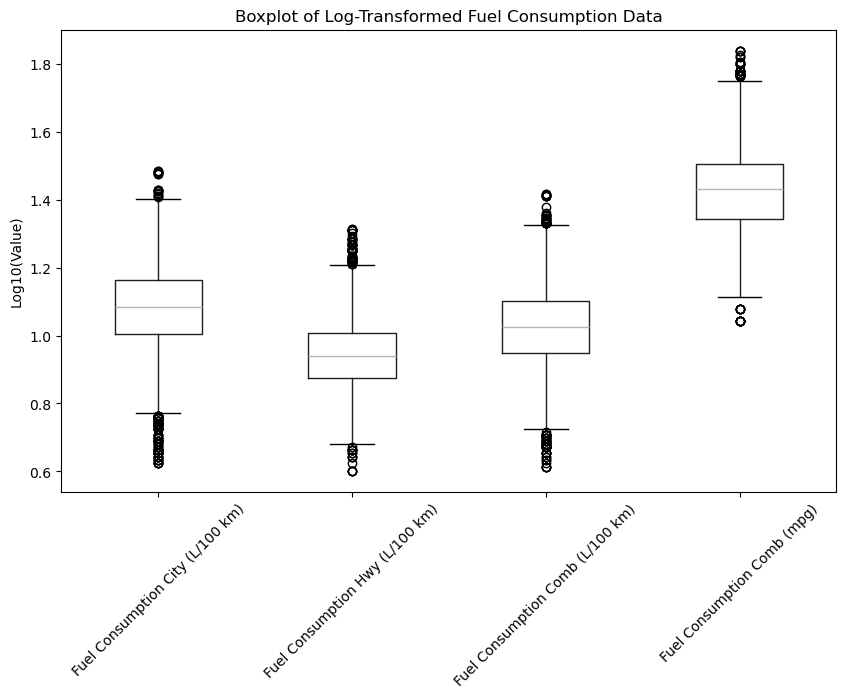

In [68]:
ols = ['Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)',
       'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)']

temp = pop.loc[:, ols].copy()
temp = temp.apply(pd.to_numeric, errors='coerce')
temp[temp <= 0] = np.nan
temp = np.log10(temp)
plt.figure(figsize=(10, 6))
temp.boxplot(grid=False, rot=45)
plt.title("Boxplot of Log-Transformed Fuel Consumption Data")
plt.ylabel("Log10(Value)")
plt.show()


- **Histograms for all numerical features**

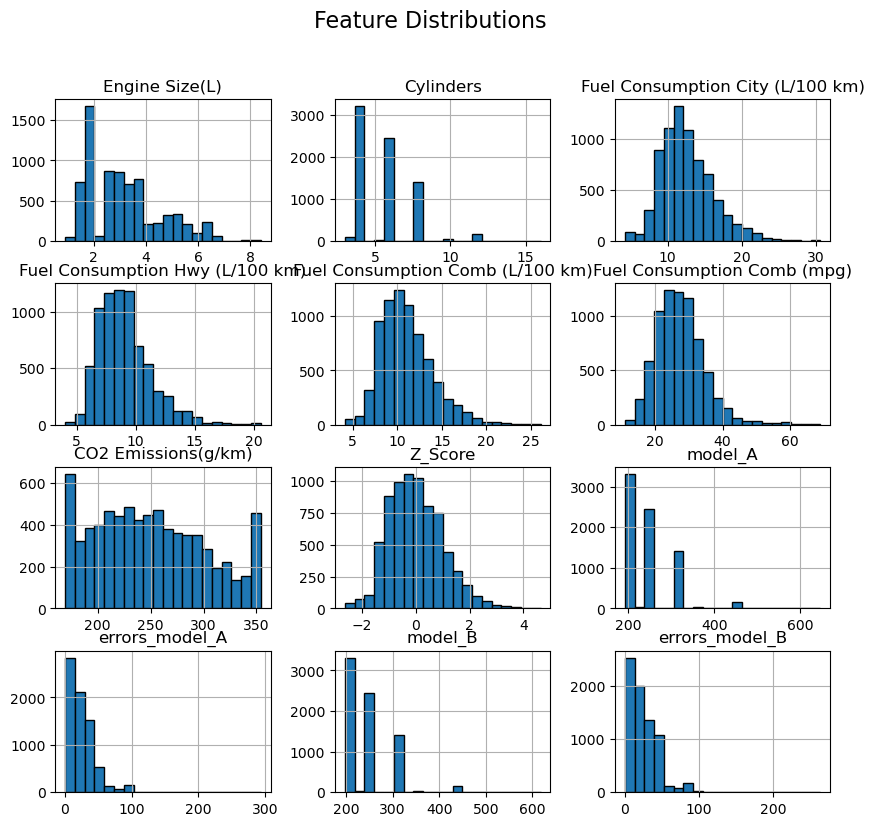

In [70]:
df.hist(figsize=(10, 9), bins=20, edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

- **Comparing actual vs. predicted CO₂ emissions Scatter Plot**

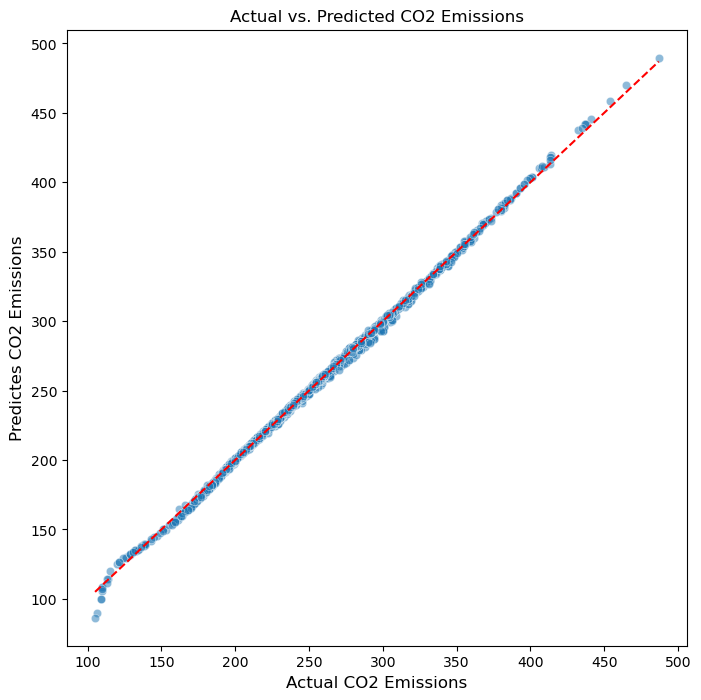

In [72]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred.flatten(), alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual CO2 Emissions", fontsize=12)
plt.ylabel("Predictes CO2 Emissions", fontsize=12)
plt.title("Actual vs. Predicted CO2 Emissions", fontsize=12)
plt.show()

- **Actual - Predicted CO₂ Emissions Error Distribution Graph** :
   **It helps assess model accuracy, bias, and variance.**

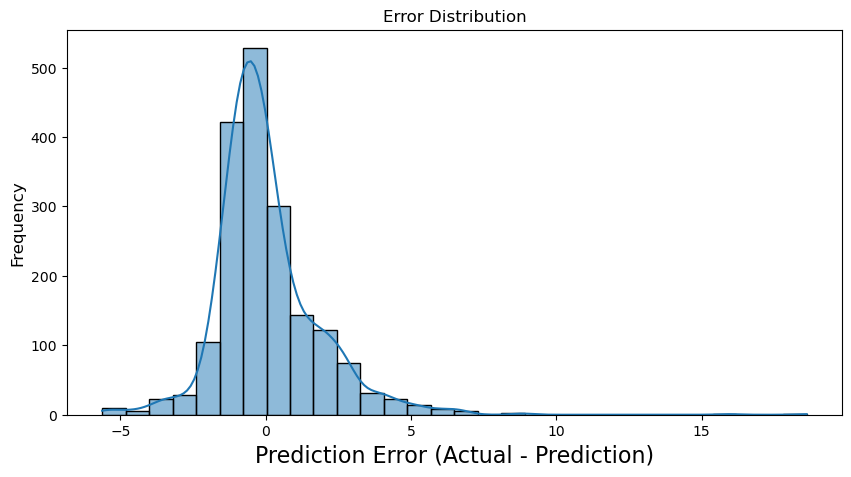

In [74]:
errors = y_test - y_pred.flatten()

plt.figure(figsize=(10, 5))
sns.histplot(errors, bins=30, kde=True)
plt.xlabel("Prediction Error (Actual - Prediction)", fontsize=16)
plt.ylabel("Frequency", fontsize=12)
plt.title("Error Distribution", fontsize=12)
plt.show()

- **3D Scatter Plot → Visualizes impact of two independent variables on CO2 Emissions.**

In [76]:
features = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)']
target = 'CO2 Emissions(g/km)'

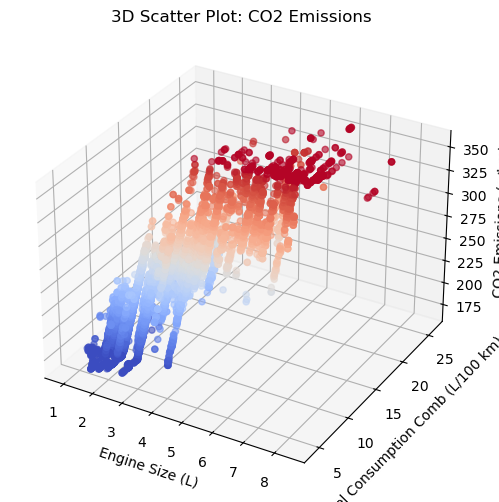

In [77]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Engine Size(L)'], df['Fuel Consumption Comb (L/100 km)'], df[target], c=df[target], cmap='coolwarm', alpha=0.6)
ax.set_xlabel('Engine Size (L)')
ax.set_ylabel('Fuel Consumption Comb (L/100 km)')
ax.set_zlabel('CO2 Emissions (g/km)')
ax.set_title('3D Scatter Plot: CO2 Emissions')
plt.show()

- **Histogram of Residuals → Checks for normality.**

In [79]:
features = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)']
target = 'CO2 Emissions(g/km)'

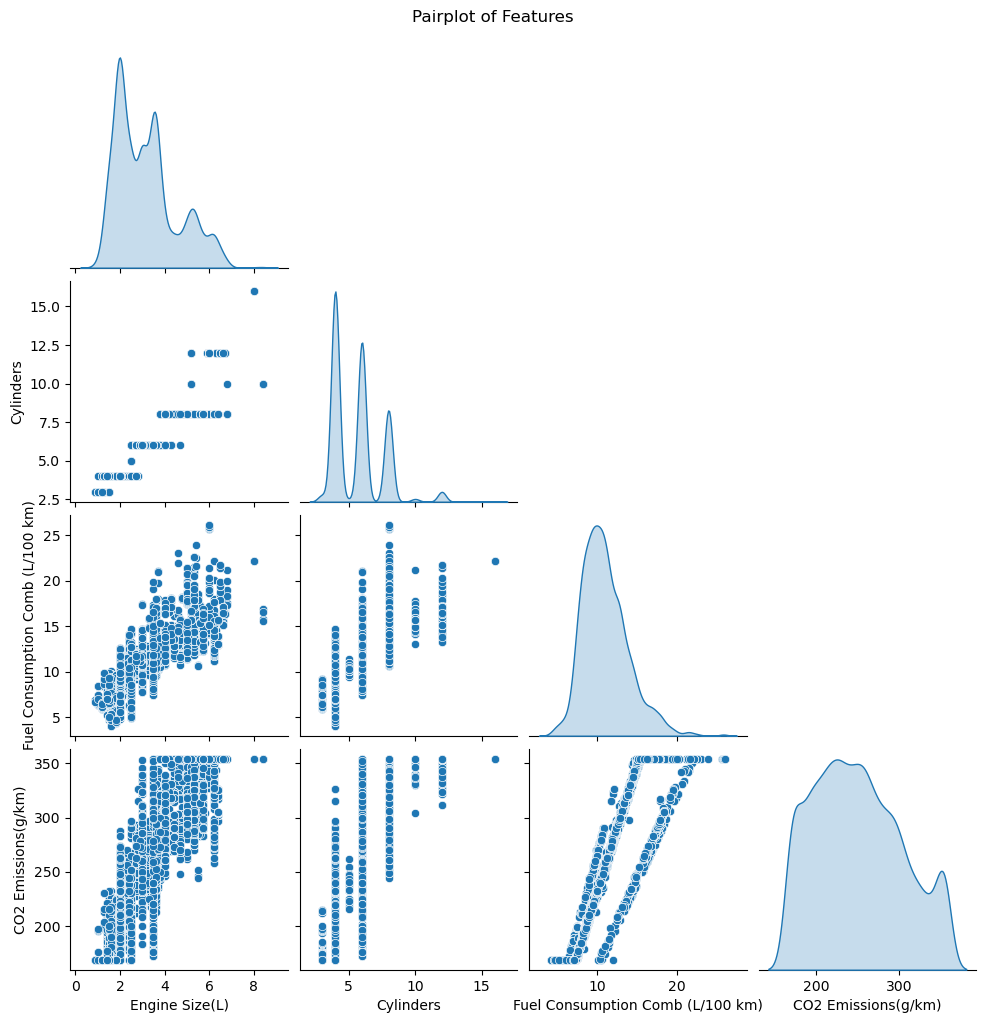

In [80]:
sns.pairplot(df[features + [target]], diag_kind="kde", corner=True)
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

- **Distribution Analysis of Categorical Variables**

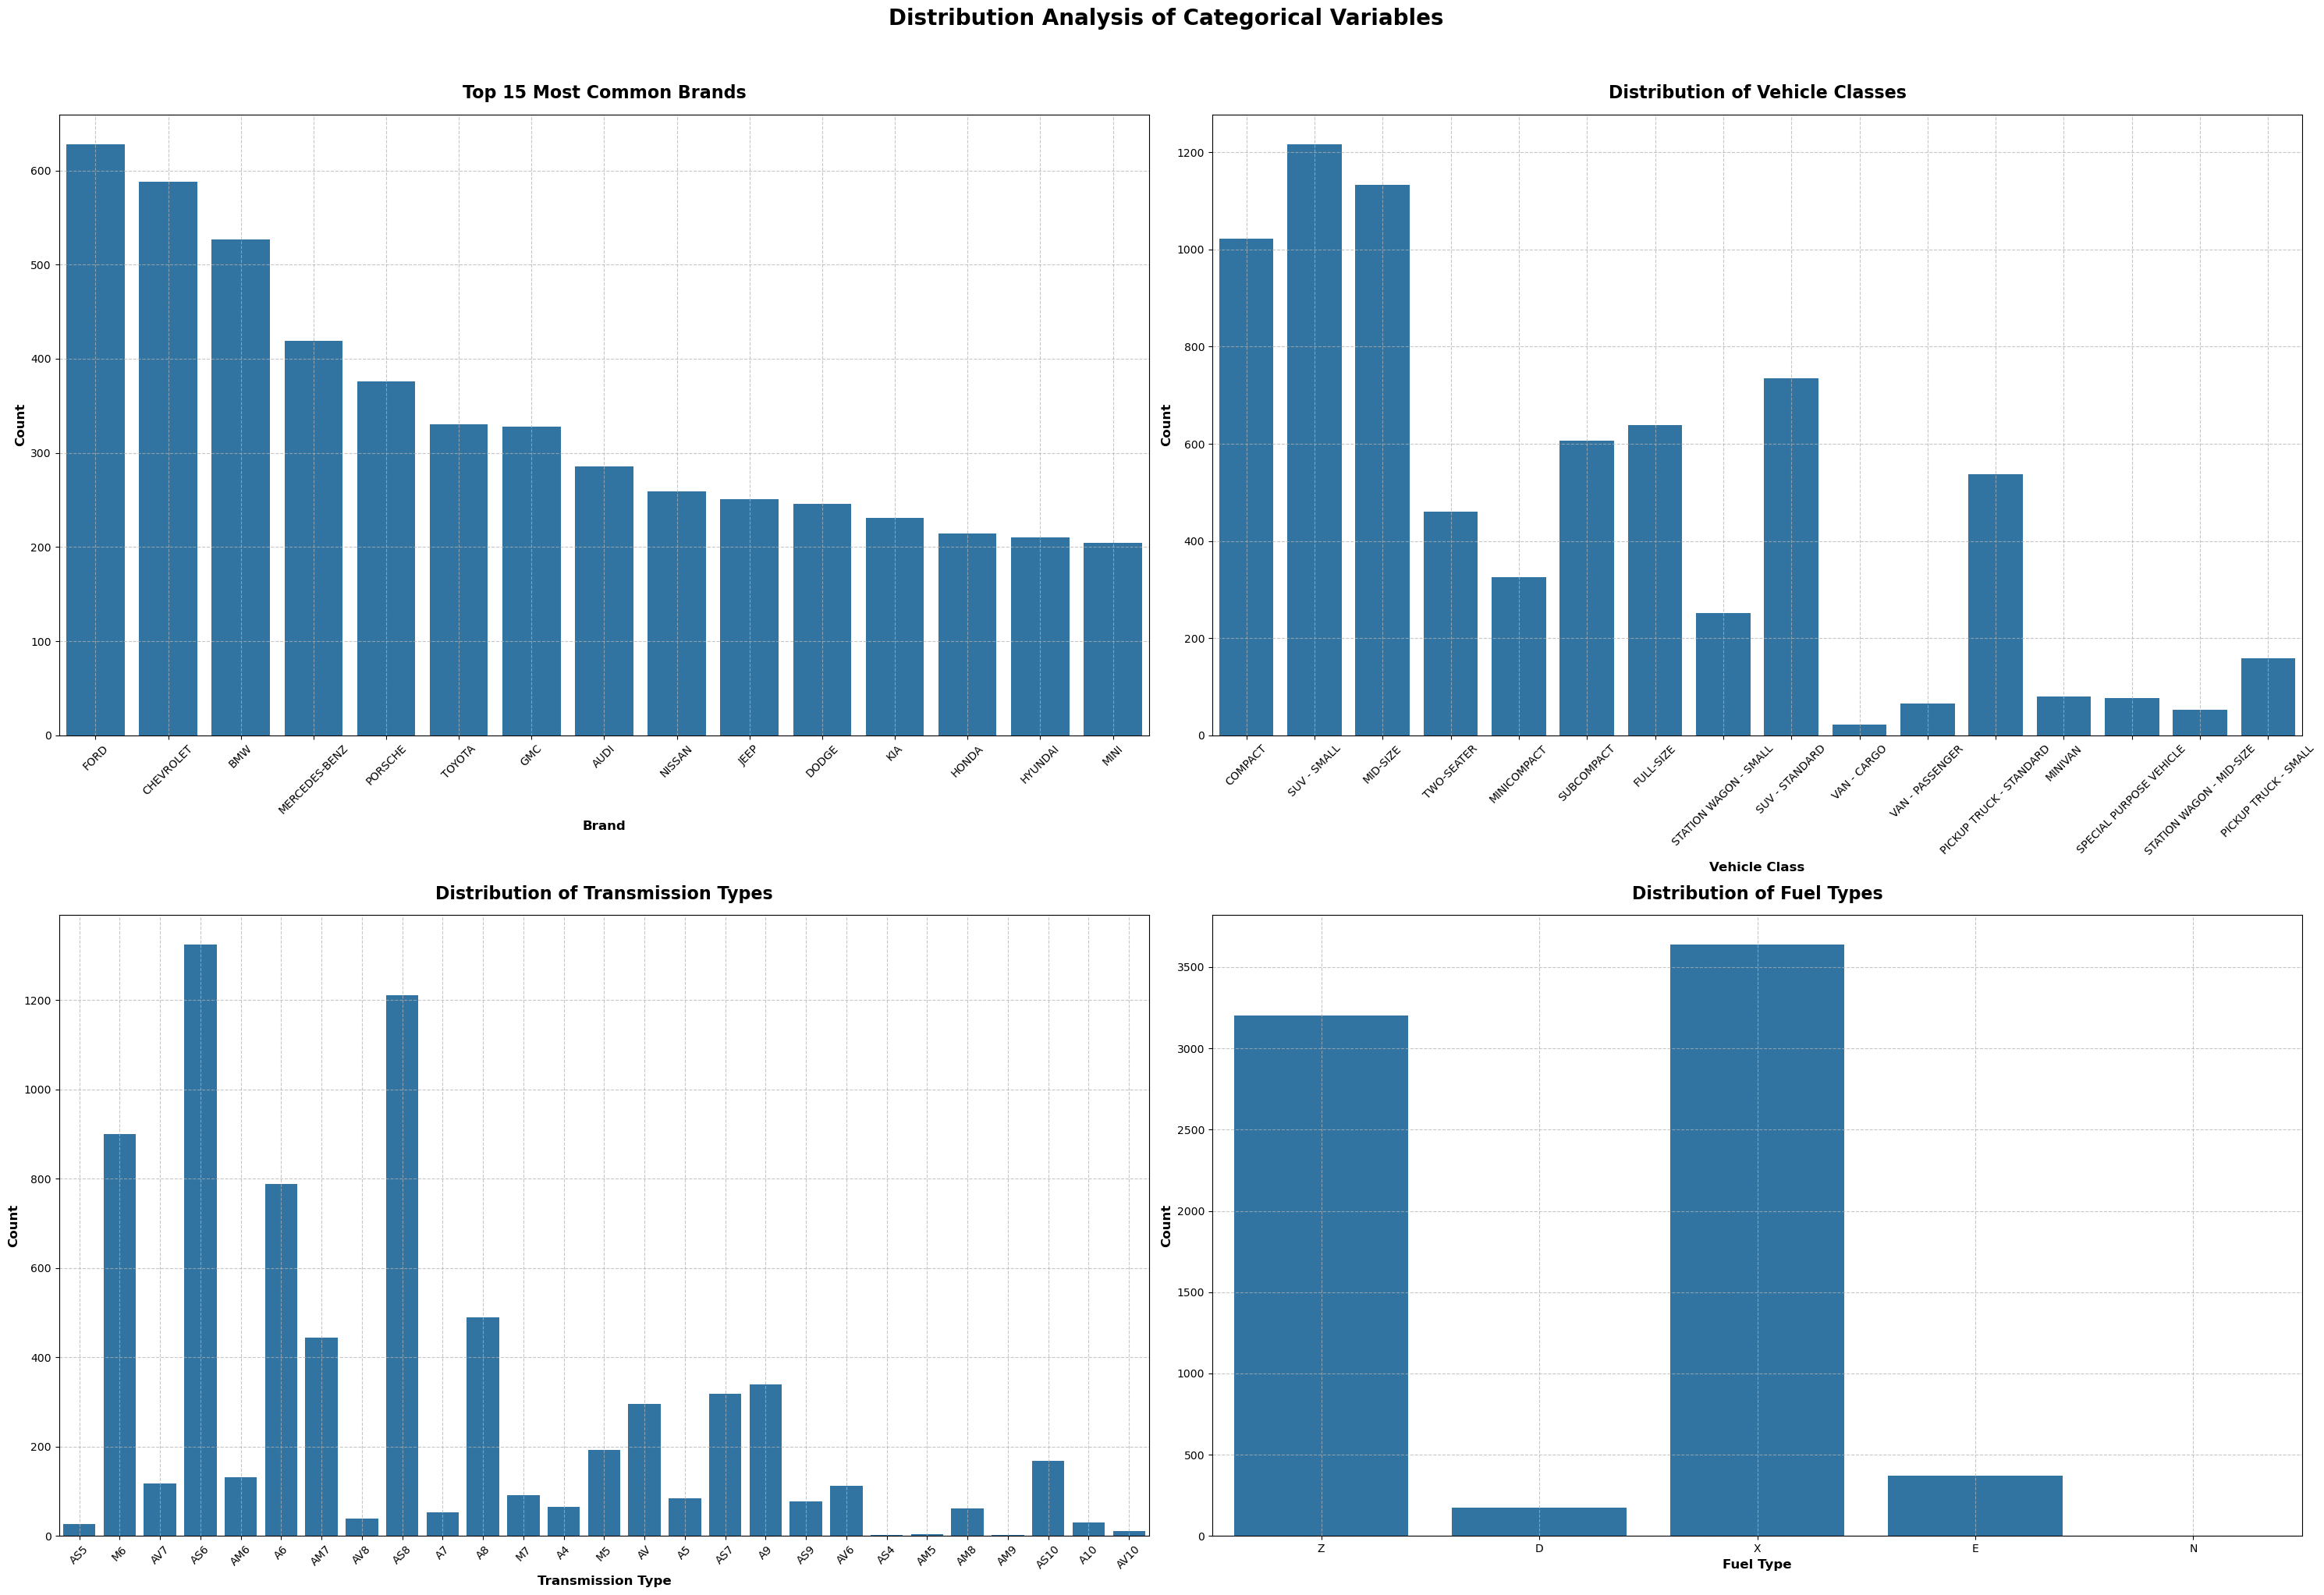

In [82]:
fig, axes = plt.subplots(2, 2, figsize=(30, 20))

sns.countplot(data=df, x='Make', ax=axes[0,0], 
              order=df['Make'].value_counts().iloc[:15].index)
axes[0,0].set_title('Top 15 Most Common Brands', pad=15, fontsize=16, fontweight='bold')
axes[0,0].set_xlabel('Brand', fontsize=12, fontweight='bold')
axes[0,0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0,0].tick_params(axis='x', rotation=45, labelsize=10)
axes[0,0].tick_params(axis='y', labelsize=10)
axes[0,0].grid(True, linestyle='--', alpha=0.7)

sns.countplot(data=df, x='Vehicle Class', ax=axes[0,1])
axes[0,1].set_title('Distribution of Vehicle Classes', pad=15, fontsize=16, fontweight='bold')
axes[0,1].set_xlabel('Vehicle Class', fontsize=12, fontweight='bold')
axes[0,1].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0,1].tick_params(axis='x', rotation=45, labelsize=10)
axes[0,1].tick_params(axis='y', labelsize=10)
axes[0,1].grid(True, linestyle='--', alpha=0.7)

sns.countplot(data=df, x='Transmission', ax=axes[1,0])
axes[1,0].set_title('Distribution of Transmission Types', pad=15, fontsize=16, fontweight='bold')
axes[1,0].set_xlabel('Transmission Type', fontsize=12, fontweight='bold')
axes[1,0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[1,0].tick_params(axis='x', rotation=45, labelsize=10)
axes[1,0].tick_params(axis='y', labelsize=10)
axes[1,0].grid(True, linestyle='--', alpha=0.7)

sns.countplot(data=df, x='Fuel Type', ax=axes[1,1])
axes[1,1].set_title('Distribution of Fuel Types', pad=15, fontsize=16, fontweight='bold')
axes[1,1].set_xlabel('Fuel Type', fontsize=12, fontweight='bold')
axes[1,1].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[1,1].tick_params(axis='x', labelsize=10)
axes[1,1].tick_params(axis='y', labelsize=10)
axes[1,1].grid(True, linestyle='--', alpha=0.7)

plt.suptitle('Distribution Analysis of Categorical Variables', fontsize=20, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

- **Correlation Between Numerical Variables**

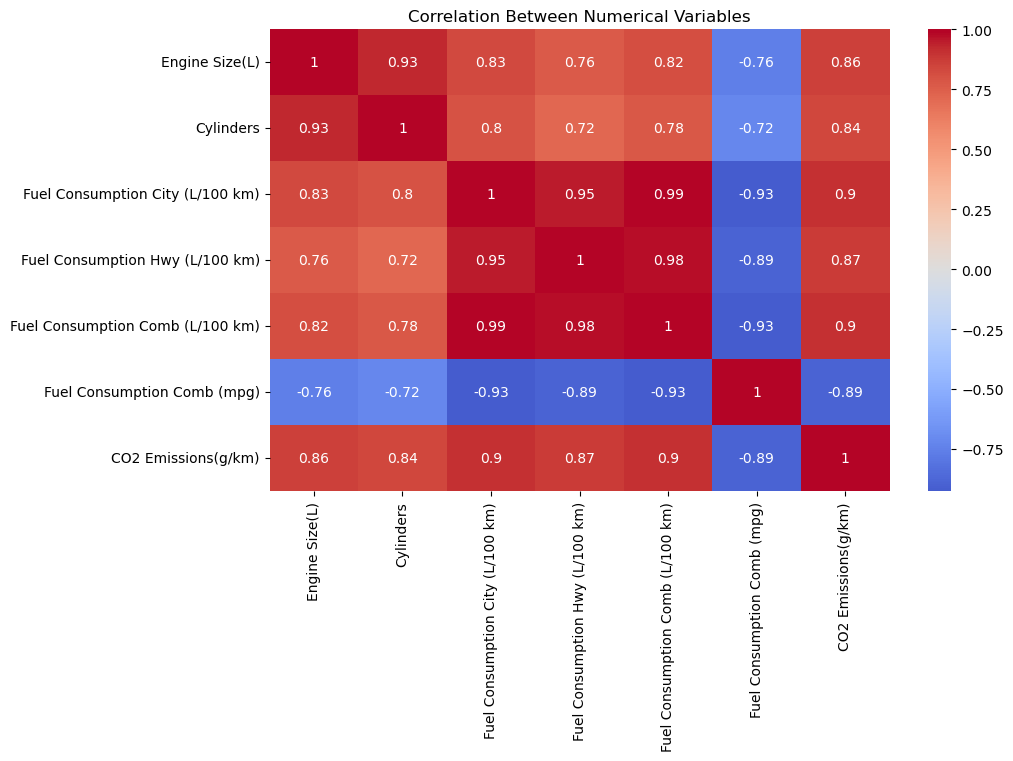

In [84]:
numeric_cols = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 
                'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 
                'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']

plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Numerical Variables')
plt.show()

- **CO2 Emissions by Vehicle Class**

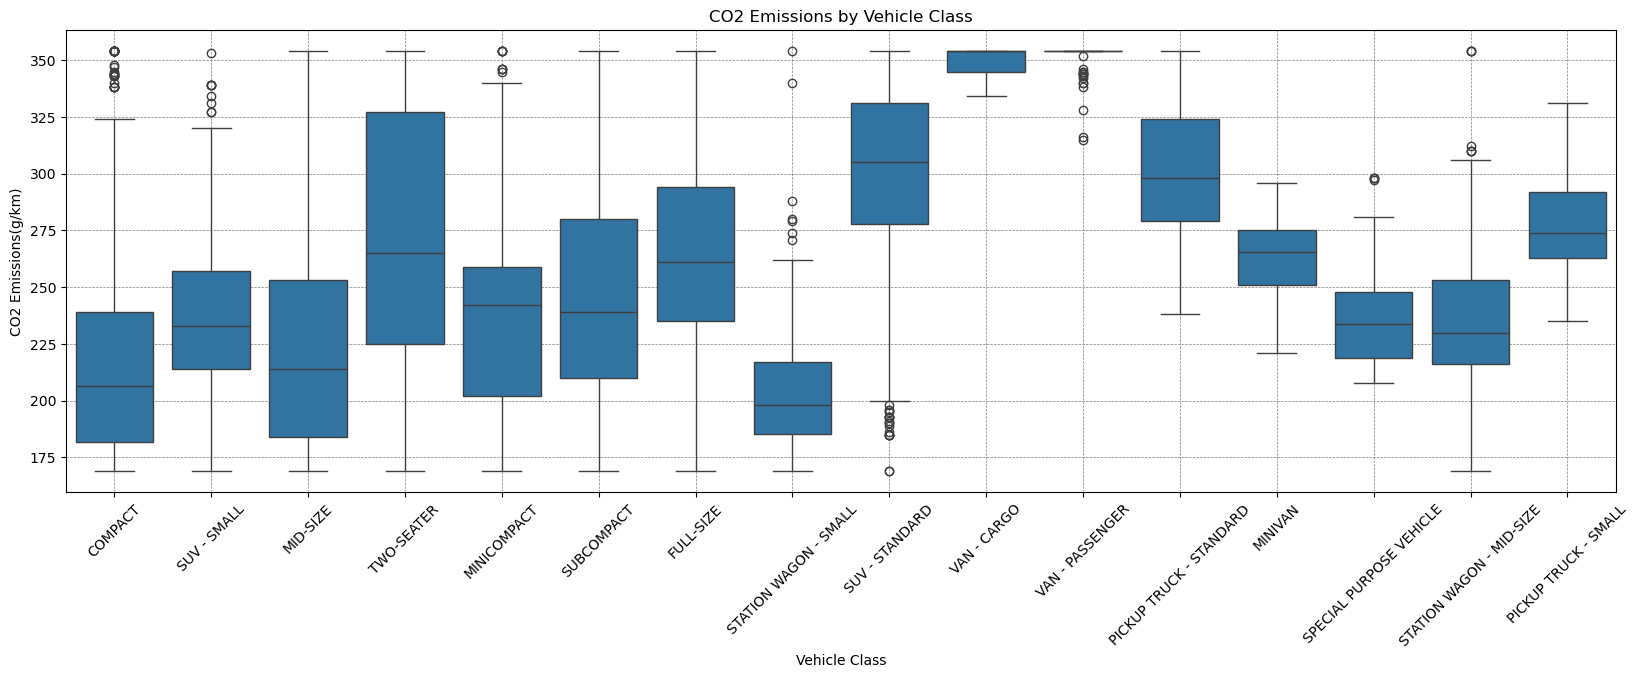

In [86]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=df, x='Vehicle Class', y='CO2 Emissions(g/km)')
plt.xticks(rotation=45)
plt.title('CO2 Emissions by Vehicle Class')
plt.grid(True, linestyle="--", linewidth=0.5, color="gray")
plt.show()

- **CO2 Emissions by Number of Cylinders**

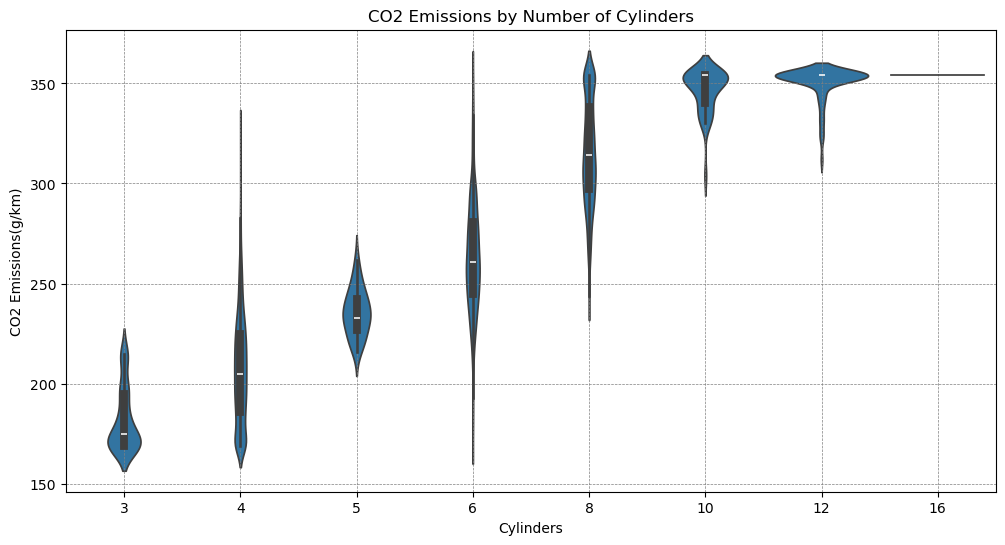

In [88]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Cylinders', y='CO2 Emissions(g/km)')
plt.title('CO2 Emissions by Number of Cylinders')
plt.grid(True, linestyle="--", linewidth=0.5, color="gray")
plt.show()

- **Average CO2 Emissions by Top 15 Manufacturers**

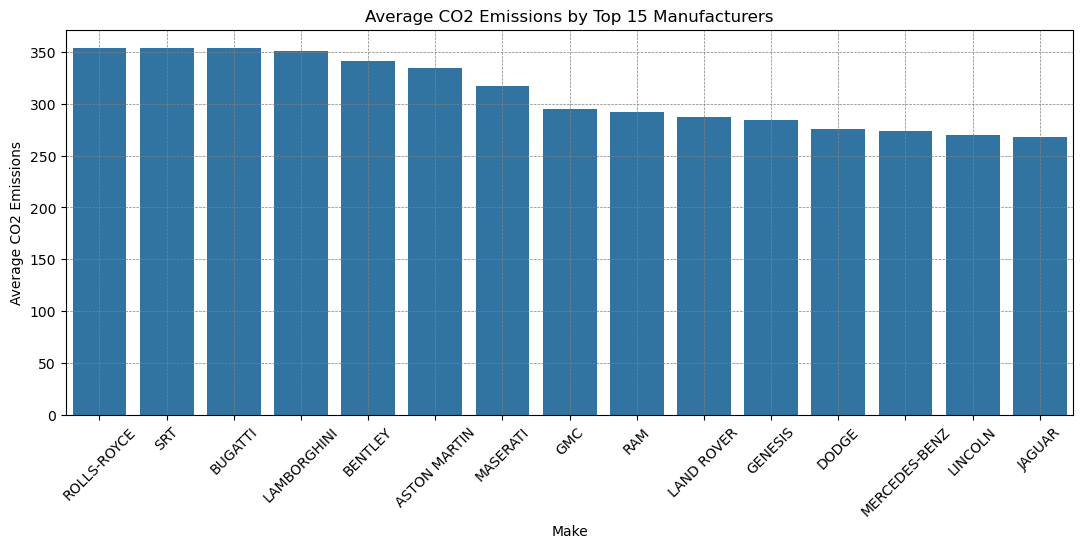

In [90]:
plt.figure(figsize=(13, 5))
avg_co2_by_make = df.groupby('Make')['CO2 Emissions(g/km)'].mean().sort_values(ascending=False).head(15)
sns.barplot(x=avg_co2_by_make.index, y=avg_co2_by_make.values)
plt.title('Average CO2 Emissions by Top 15 Manufacturers')
plt.xticks(rotation=45)
plt.ylabel('Average CO2 Emissions')
plt.grid(True, linestyle="--", linewidth=0.5, color="gray")
plt.show()

#### **Engine Size vs CO2 Emissions**
- **Relationship between engine size and CO2 emissions**

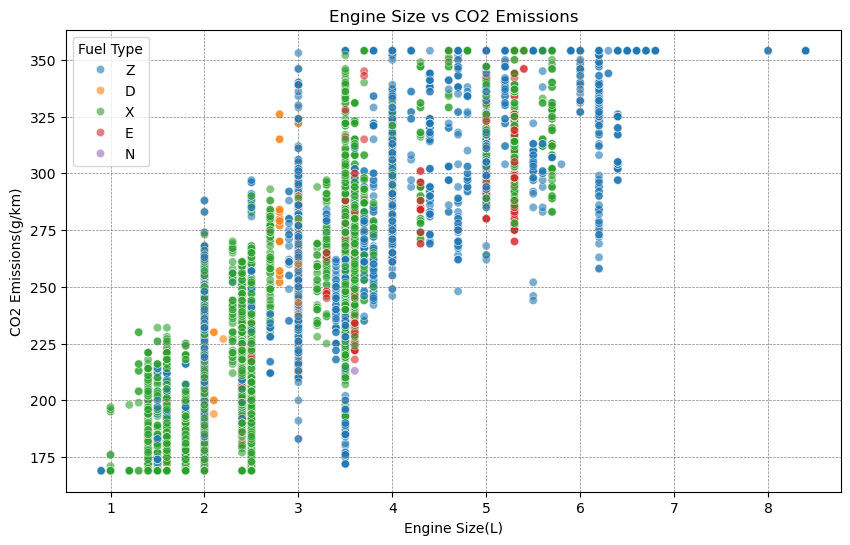

In [92]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Engine Size(L)', y='CO2 Emissions(g/km)', hue='Fuel Type', alpha=0.6)
plt.title('Engine Size vs CO2 Emissions')
plt.grid(True, linestyle="--", linewidth=0.5, color="gray")
plt.show()